In [26]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [27]:
def generate_piecewise(size: int, shapes: int = 3):
    rng = np.random.default_rng()
    start = 0
    colors = []
    regions = shapes + 1
    for r in range(regions):
        start += rng.integers(128//regions, 255//regions)
        colors.append(start)
    rng.shuffle(colors)
    piecewise = np.ones((size, size))
    piecewise *= colors[0]
    for i in range(1, regions):
        start_x = rng.uniform(0, size-3)
        start_y = rng.uniform(0, size-3)
        end_x = start_x + rng.normal((size-start_x)/2)
        end_x = max(end_x, start_x+3)
        end_y = start_y + rng.normal((size-start_y)/2)
        end_y = max(end_y, start_y+3)
        start_x, start_y, end_x, end_y = np.array([start_x, start_y, end_x, end_y],dtype = int)
        piecewise[start_y:end_y, start_x:end_x] = colors[i]
    masks = []
    for i in range(1, regions):
        masks.append(piecewise==colors[i])
    return piecewise, masks

In [28]:
def add_noise(piecewise: np.array, intensity: int = 8):
    rng = np.random.default_rng()
    noise = rng.normal(scale=intensity, size=piecewise.shape)
    piecewise += noise.astype(int)
    return np.clip(piecewise, 0, 255)

In [29]:
piecewise, masks = generate_piecewise(30)
piecewise = add_noise(piecewise)

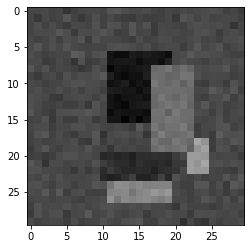

In [30]:
current = int(time.time())
plt.imsave(f"{current}.png", piecewise, cmap='gray', vmin=0, vmax=255)
for i in range(len(masks)):
    plt.imsave(f"{current}_mask_{i}.png", masks[i], cmap='gray', vmin=0, vmax=1)
plt.imshow(piecewise, cmap='gray', vmin=0, vmax=255)